In [62]:
import sys
sys.path.append("../prog")
import cauFirst

In [63]:
#!/usr/bin/env python
# coding: utf-8


import yaml
import sys
import copy

from collections import OrderedDict

if True:
    def represent_odict(dumper, instance):
        return dumper.represent_mapping('tag:yaml.org,2002:map', instance.items())

    yaml.add_representer(OrderedDict, represent_odict)

    def construct_odict(loader, node):
        return OrderedDict(loader.construct_pairs(node))

    yaml.add_constructor('tag:yaml.org,2002:map', construct_odict)

class FDTreeSet(object):
    def __init__(self):
        self.wfblockall = []
        self.lkblockall = []

    def load(self,filename):
        data = None
        with open(filename) as f:
            data = yaml.safe_load(f)
        return data

    def apply_link(self,data,filename):
        key1 = "link"
        linkcontent = ["nodename","nodetype","linktype"]
        linklist =  []
        for link in data[key1]:
            alink = []
            for content in linkcontent:
                if content in link.keys():
                    alink.append( (content,link[content]) )
            alink.append( ("filename",filename) )
            if "link" in link.keys():
                newlink = apply_link(link,filename)
                alink.append( ("link", newlink ) )
            linklist.append(  OrderedDict(alink) )
        return linklist

    def wf_add_tag_filename(self,blocklist,filename=None):


        wfblockall = []
        for i,wf in enumerate(blocklist):

            if wf["blockname"] is None or len(wf["blockname"])==0:
                wf["blockname"] = "{}#{}".format(filename,i)
            wf.update({"filename":filename})
            wfblockall.append( copy.deepcopy(wf) )

        return wfblockall

    def lk_add_tag_filename(self,blocklist):
        linkblockall = []
        for link in blocklist:

            #link.update({"filename":filename})
            #linkblockall.extend(apply_link(link,filename) )
            linkblockall.extend(link )
        return linkblockall

    def load_files(self,filenames):
        dataall = {}

        wfblockall = self.wfblockall
        lkblockall = self.lkblockall

        for filename in filenames:
          data = self.load(filename)

          for key in data:
              if key=="workflow":
                  data = self.wf_add_tag_filename(data[key]["block"],filename)
                  wfblockall.extend(data)
              elif key=="linkset":
                  #data = lk_add_tag_filename(data[key]["block"],filename)
                  ablock = data[key]["block"]
                  lkblockall.extend(ablock)

        self.wfblockall = wfblockall
        self.lkblockall = lkblockall
        

        #output = OrderedDict([("workflow",{ "block": wfblockall}), ("linkset",{"block": lkblockall} )] )
        #return output
    
    def export_dic(self):
        wfblockall = self.wfblockall
        lkblockall = self.lkblockall
        output = OrderedDict([("workflow",{ "block": wfblockall}), ("linkset",{"block": lkblockall} )] )
        return output
    
    def print_wf(self):
        for x in self.wfblockall:
            print("workflow:",x["blockname"])
            
    def print_lk(self):
        for x in self.lkblockall:
            print("link:",x["link"][0]["nodename"])
            
    def print_names(self,name=None):
        if name is None:
            self.print_wf()
            self.print_lk()
        if name in ["wf"]:
            self.print_wf()
        if name in ["lk"]:
            self.print_lk()

            

In [64]:
import glob
filenames = ["../sample/MaterialsList_CrystalCandidates.yml",
            "../sample/MaterialsList_RegressionModel.yml",
             "../sample/MaterialsList_SearchGoodMaterial.yml",
             "../sample/MaterialsList_TrainingSet.yml",
             "../sample/MaterialsList_aquisitionFunction.yml"
            ]

workflow: random generation
workflow: random generation
workflow: mateirals knowledge
workflow: mateirals knowledge Target variable
workflow: mateirals knowledge Target variable
workflow: ../sample/MaterialsList_RegressionModel.yml#0
workflow: ../sample/MaterialsList_RegressionModel.yml#1
workflow: ../sample/MaterialsList_RegressionModel.yml#2
workflow: ../sample/MaterialsList_SearchGoodMaterial.yml#0
workflow: ../sample/MaterialsList_SearchGoodMaterial.yml#1
workflow: ../sample/MaterialsList_SearchGoodMaterial.yml#2
workflow: ../sample/MaterialsList_SearchGoodMaterial.yml#3
workflow: ../sample/MaterialsList_TrainingSet.yml#0
workflow: ../sample/MaterialsList_TrainingSet.yml#1
workflow: ../sample/MaterialsList_TrainingSet.yml#2
workflow: ../sample/MaterialsList_TrainingSet.yml#3
workflow: ../sample/MaterialsList_aquisitionFunction.yml#0
workflow: ../sample/MaterialsList_aquisitionFunction.yml#1
png is made.


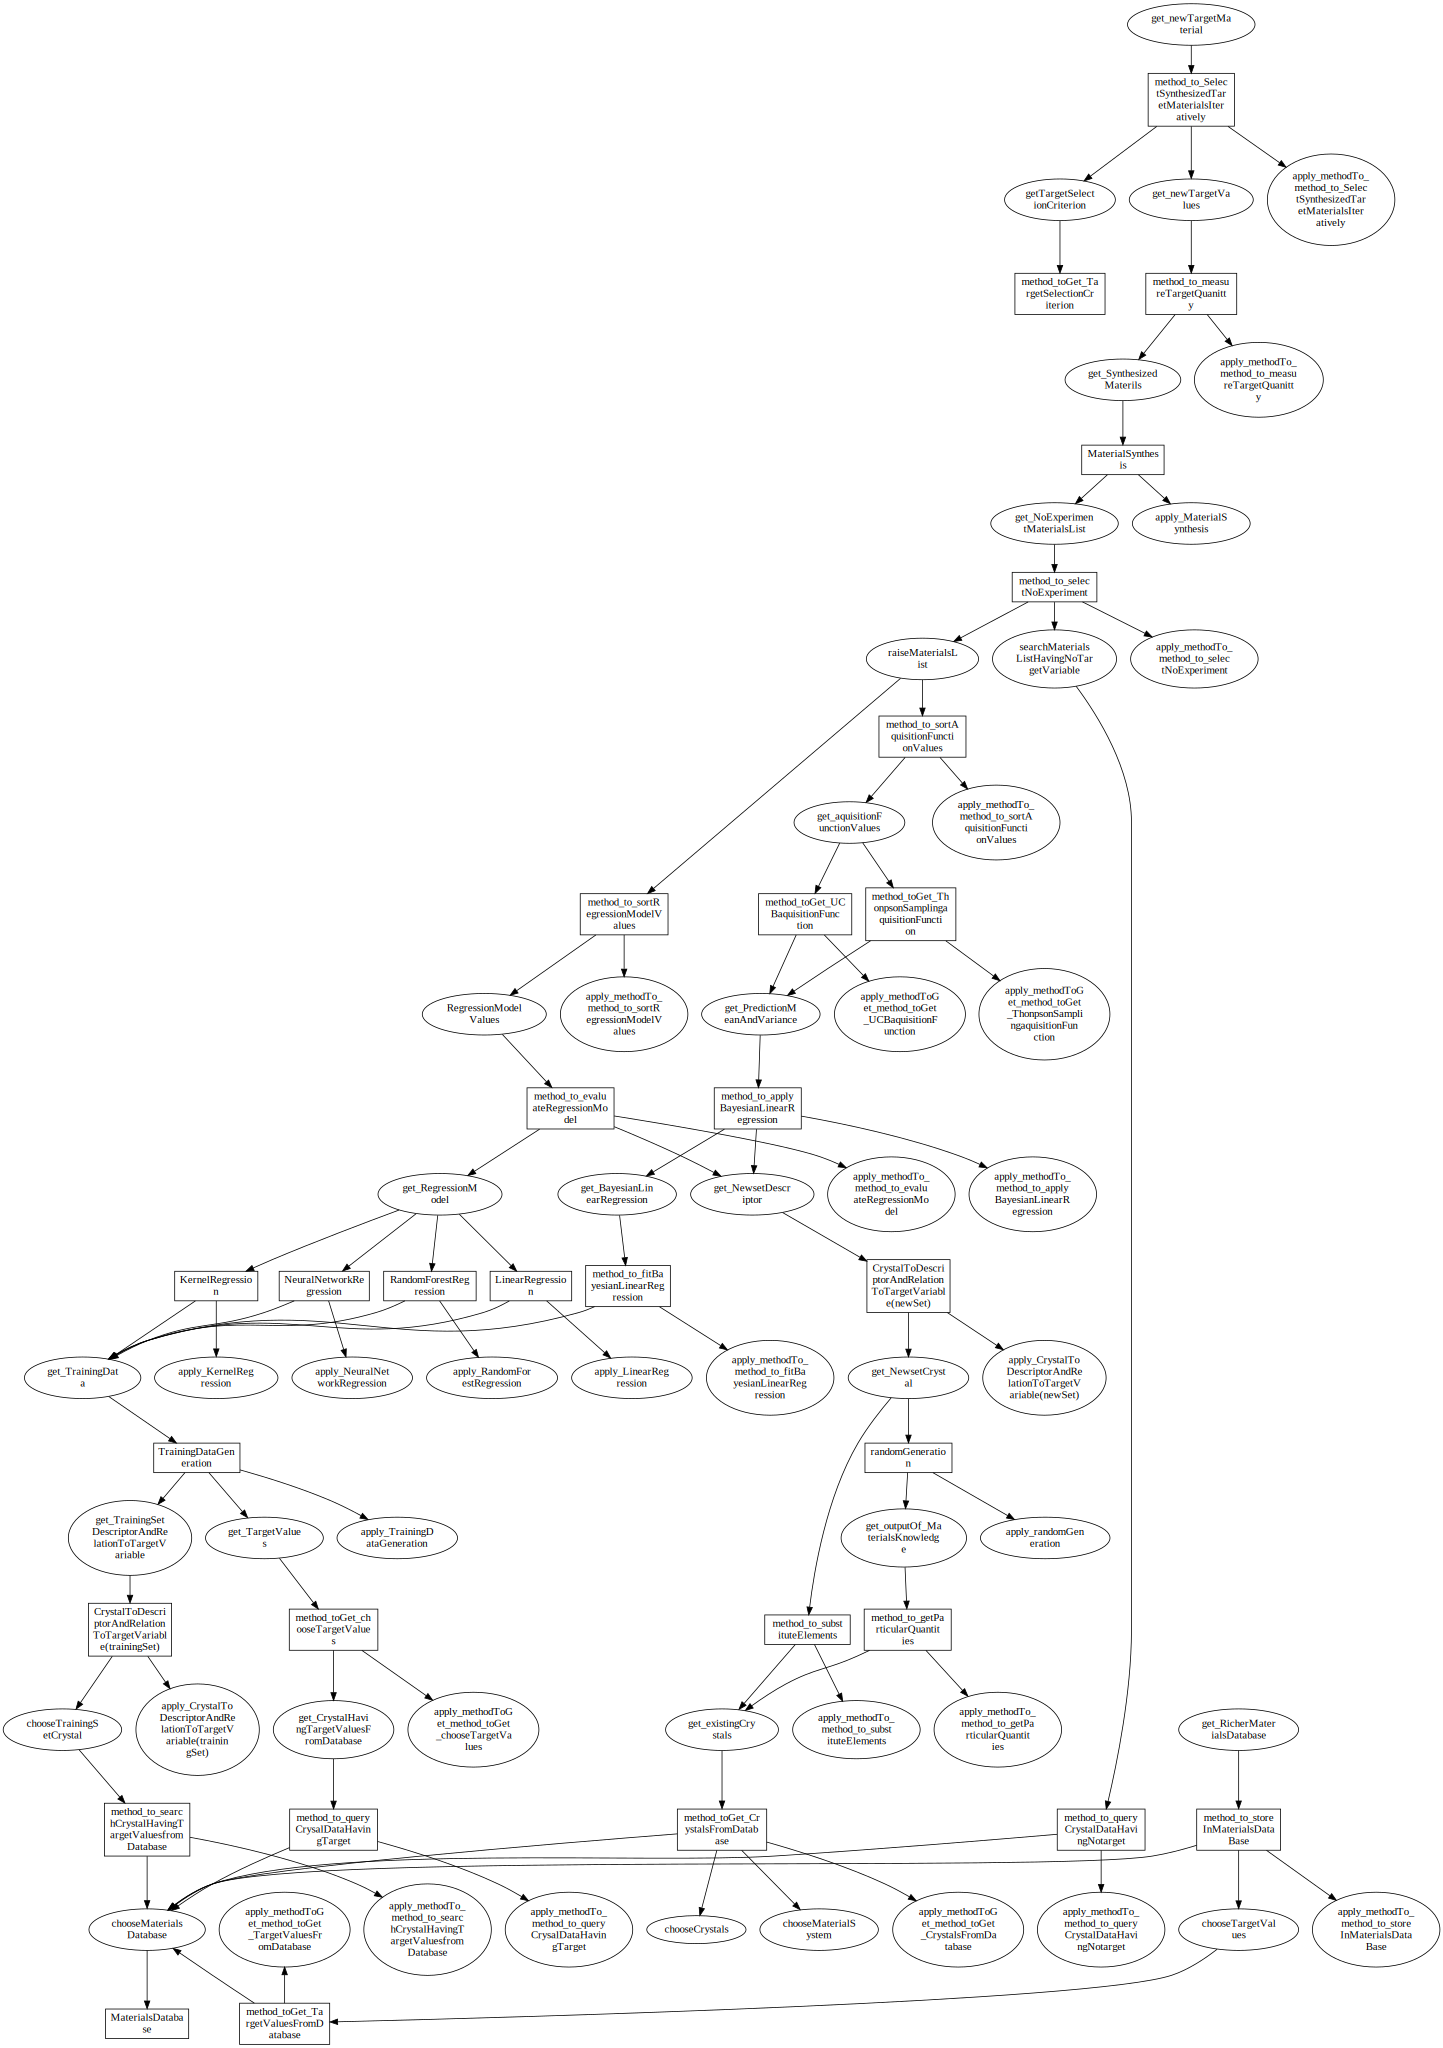

In [65]:
fdtset = FDTreeSet()

fdtset.load_files(filenames)

fdtset.print_names()

fdtree = cauFirst.FDTree()


fdtree.apply(fdtset.export_dic())

In [66]:
fdtset.wfblockall

[{'blockname': 'random generation',
  'order': 'workflow',
  'list': [{'group': [{'outputname': 'MaterialsKnowledge',
      'outputtype': 'method'}]},
   {'group': [{'methodname': 'randomGeneration',
      'methodtype': 'method',
      'outputname': 'NewsetCrystal',
      'outputtype': 'parts'}]}],
  'filename': '../sample/MaterialsList_CrystalCandidates.yml'},
 {'blockname': 'random generation',
  'order': 'workflow',
  'list': [{'group': [{'outputname': 'existingCrystals',
      'outputtype': 'parts'}]},
   {'group': [{'methodname': 'substituteElements',
      'methodtype': 'function',
      'outputname': 'NewsetCrystal',
      'outputtype': 'parts'}]}],
  'filename': '../sample/MaterialsList_CrystalCandidates.yml'},
 {'blockname': 'mateirals knowledge',
  'order': 'workflow',
  'list': [{'group': [{'methodname': 'MaterialsDatabase',
      'methodtype': 'method',
      'outputname': 'chooseMaterialsDatabase',
      'outputtype': 'function'},
     {'outputname': 'chooseMaterialSystem'

In [67]:
class WFChain(object):
    def __init__(self,wklist=None):
        if wklist is None:
            self.wklist = []
        else:
            self.wklist = wklist
            
    def extend(self,wfchain):
        self.wklist.extend(wfchain.wklist)
            
    def to_WF(self):
        wklist = self.wklist
        blocklist = []
        for wk in wklist:
            node1,node2 = wk
            if "methodname"  not in node2:
                print(node1)
                print(node2)
                raise
            name = node1["outputname"]+"-"+node2["methodname"]+"-"+node2["outputname"]
            gglist = OrderedDict( ( ("blockname", name),\
                                   ("order","workflow"),\
                      ("list", [{"group":[node1]}, {"group":[node2]} ] ) ) )
            blocklist.append(gglist)

        blocks = OrderedDict( ( ("format", "v2.3"), \
            ("block", blocklist) ) )
        wf = OrderedDict( {"workflow":blocks} )

        return wf
    
    def search_link(self,outputname1,outputname2):
        wklist = self.wklist        
        self.linklist = []
        self.search_link_inside(outputname1,outputname2)
        return self.get_selectedWFChain()
        
    def get_outputnames(self,wklist):
        namelist = []
        for node1, node2 in wklist:
            namelist.append(node1["outputname"])
            namelist.append(node2["outputname"])
        return list(set(namelist))

    def search_link_inside(self,outputname1,outputname2,link=[]):
        #print("search_link",outputname1,outputname2)
        if len(outputname1)==0:
            return []
        #print("link",link)
        wklist = self.wklist
        subwklist = []
        wklistnext = []
        for node1, node2 in wklist:
            if node1["outputname"] == outputname1:
                wklistnext.append( node2["outputname"] )
                #subwklist.append( [node1,node2])
                if outputname2 is not None:
                    if node2["outputname"] == outputname2:
                        link.append([outputname1,outputname2])
                        print("found link",link)
                        self.linklist.append(link)
                        return 

        wklistnext = list(set(wklistnext))
        #print("wklistnext",wklistnext)
        for newoutputname1 in wklistnext:
            newlink = copy.deepcopy(link)
            newlink.append([outputname1,newoutputname1])
            self.search_link_inside(newoutputname1,outputname2,newlink)
            
    def get_selectedWFChain(self):
        selectedlist = []
        wklist = self.wklist
        for link in self.linklist:
            for output1,output2 in link:
                for wk in wklist:
                    node1,node2 = wk
                    if node1["outputname"] == output1 and \
                       node2["outputname"] == output2 :
                        selectedlist.append( [copy.deepcopy(node1),copy.deepcopy(node2)])
        return WFChain(selectedlist)
        #return selectedlist
    
class wfblockToWFChaim(WFChain):
    def __init__(self,wfblockall):
        
        wklist = self.wfblockallTowklist(wfblockall)        
        wklist.extend( self.wfblockallTowklist_fromLast(wfblockall) )
    
        self.wklist = wklist
        
    def wfblockallTowklist(self,wfblockall):
        #wfblockall = self.wfblockall
        wklist = []
        for block in wfblockall:
            blockname = block["blockname"]
            for alist1,alist2 in zip(block["list"][0:-1],block["list"][1:]):
                #print(">",alist1,alist2)
                group1 = alist1["group"]
                group2 = alist2["group"]
                for node1 in group1:
                    for node2 in group2:
                        wklist.append([copy.deepcopy(node1),copy.deepcopy(node2)])
        return wklist
    
    def search_connection(self,node):
        wklist = []
        outputname = node["outputname"]
        outputtype = None
        if "outputtype" in node:
            outputtype = node["outputtype"]
        for block in fdtset.wfblockall:
            blockname = block["blockname"]
            for alist1,alist2 in zip(block["list"][0:-1],block["list"][1:]):
                group1 = alist1["group"]
                group2 = alist2["group"]
                for node1 , node2 in zip(group1,group2):
                    wklist.append([node1,node2])
                    if node1["outputname"] == node["outputname"] and \
                       node1["outputtype"] == node["outputtype"]:
                            #print("found>", node1,"->",node2)
                            wklist.append( [node1,node2])
        return wklist    
    
    def wfblockallTowklist_fromLast(self,wfblockall):
        #wfblockall = self.wfblockall
        wklist = []
        for block in wfblockall:
            blockname = block["blockname"]
            alist1 = block["list"][-1]["group"]
            #print (alist1)
            for node in alist1:
                outputname = node["outputname"]
                outputtype = None
                if "outputtype" in node:
                    outputtype = node["outputtype"]
                #print(outputname,outputtype)
                wklist.extend(self.search_connection(node))
        return wklist
    

wfchain = wfblockToWFChaim(fdtset.wfblockall)
wf = wfchain.to_WF()
print(yaml.dump(wf))

workflow:
  format: v2.3
  block:
  - blockname: MaterialsKnowledge-randomGeneration-NewsetCrystal
    order: workflow
    list:
    - group:
      - outputname: MaterialsKnowledge
        outputtype: method
    - group:
      - methodname: randomGeneration
        methodtype: method
        outputname: NewsetCrystal
        outputtype: parts
  - blockname: existingCrystals-substituteElements-NewsetCrystal
    order: workflow
    list:
    - group:
      - outputname: existingCrystals
        outputtype: parts
    - group:
      - methodname: substituteElements
        methodtype: function
        outputname: NewsetCrystal
        outputtype: parts
  - blockname: chooseMaterialsDatabase-CrystalsFromDatabase-existingCrystals
    order: workflow
    list:
    - group:
      - methodname: MaterialsDatabase
        methodtype: method
        outputname: chooseMaterialsDatabase
        outputtype: function
    - group:
      - methodname: CrystalsFromDatabase
        methodtype: parts
     

png is made.


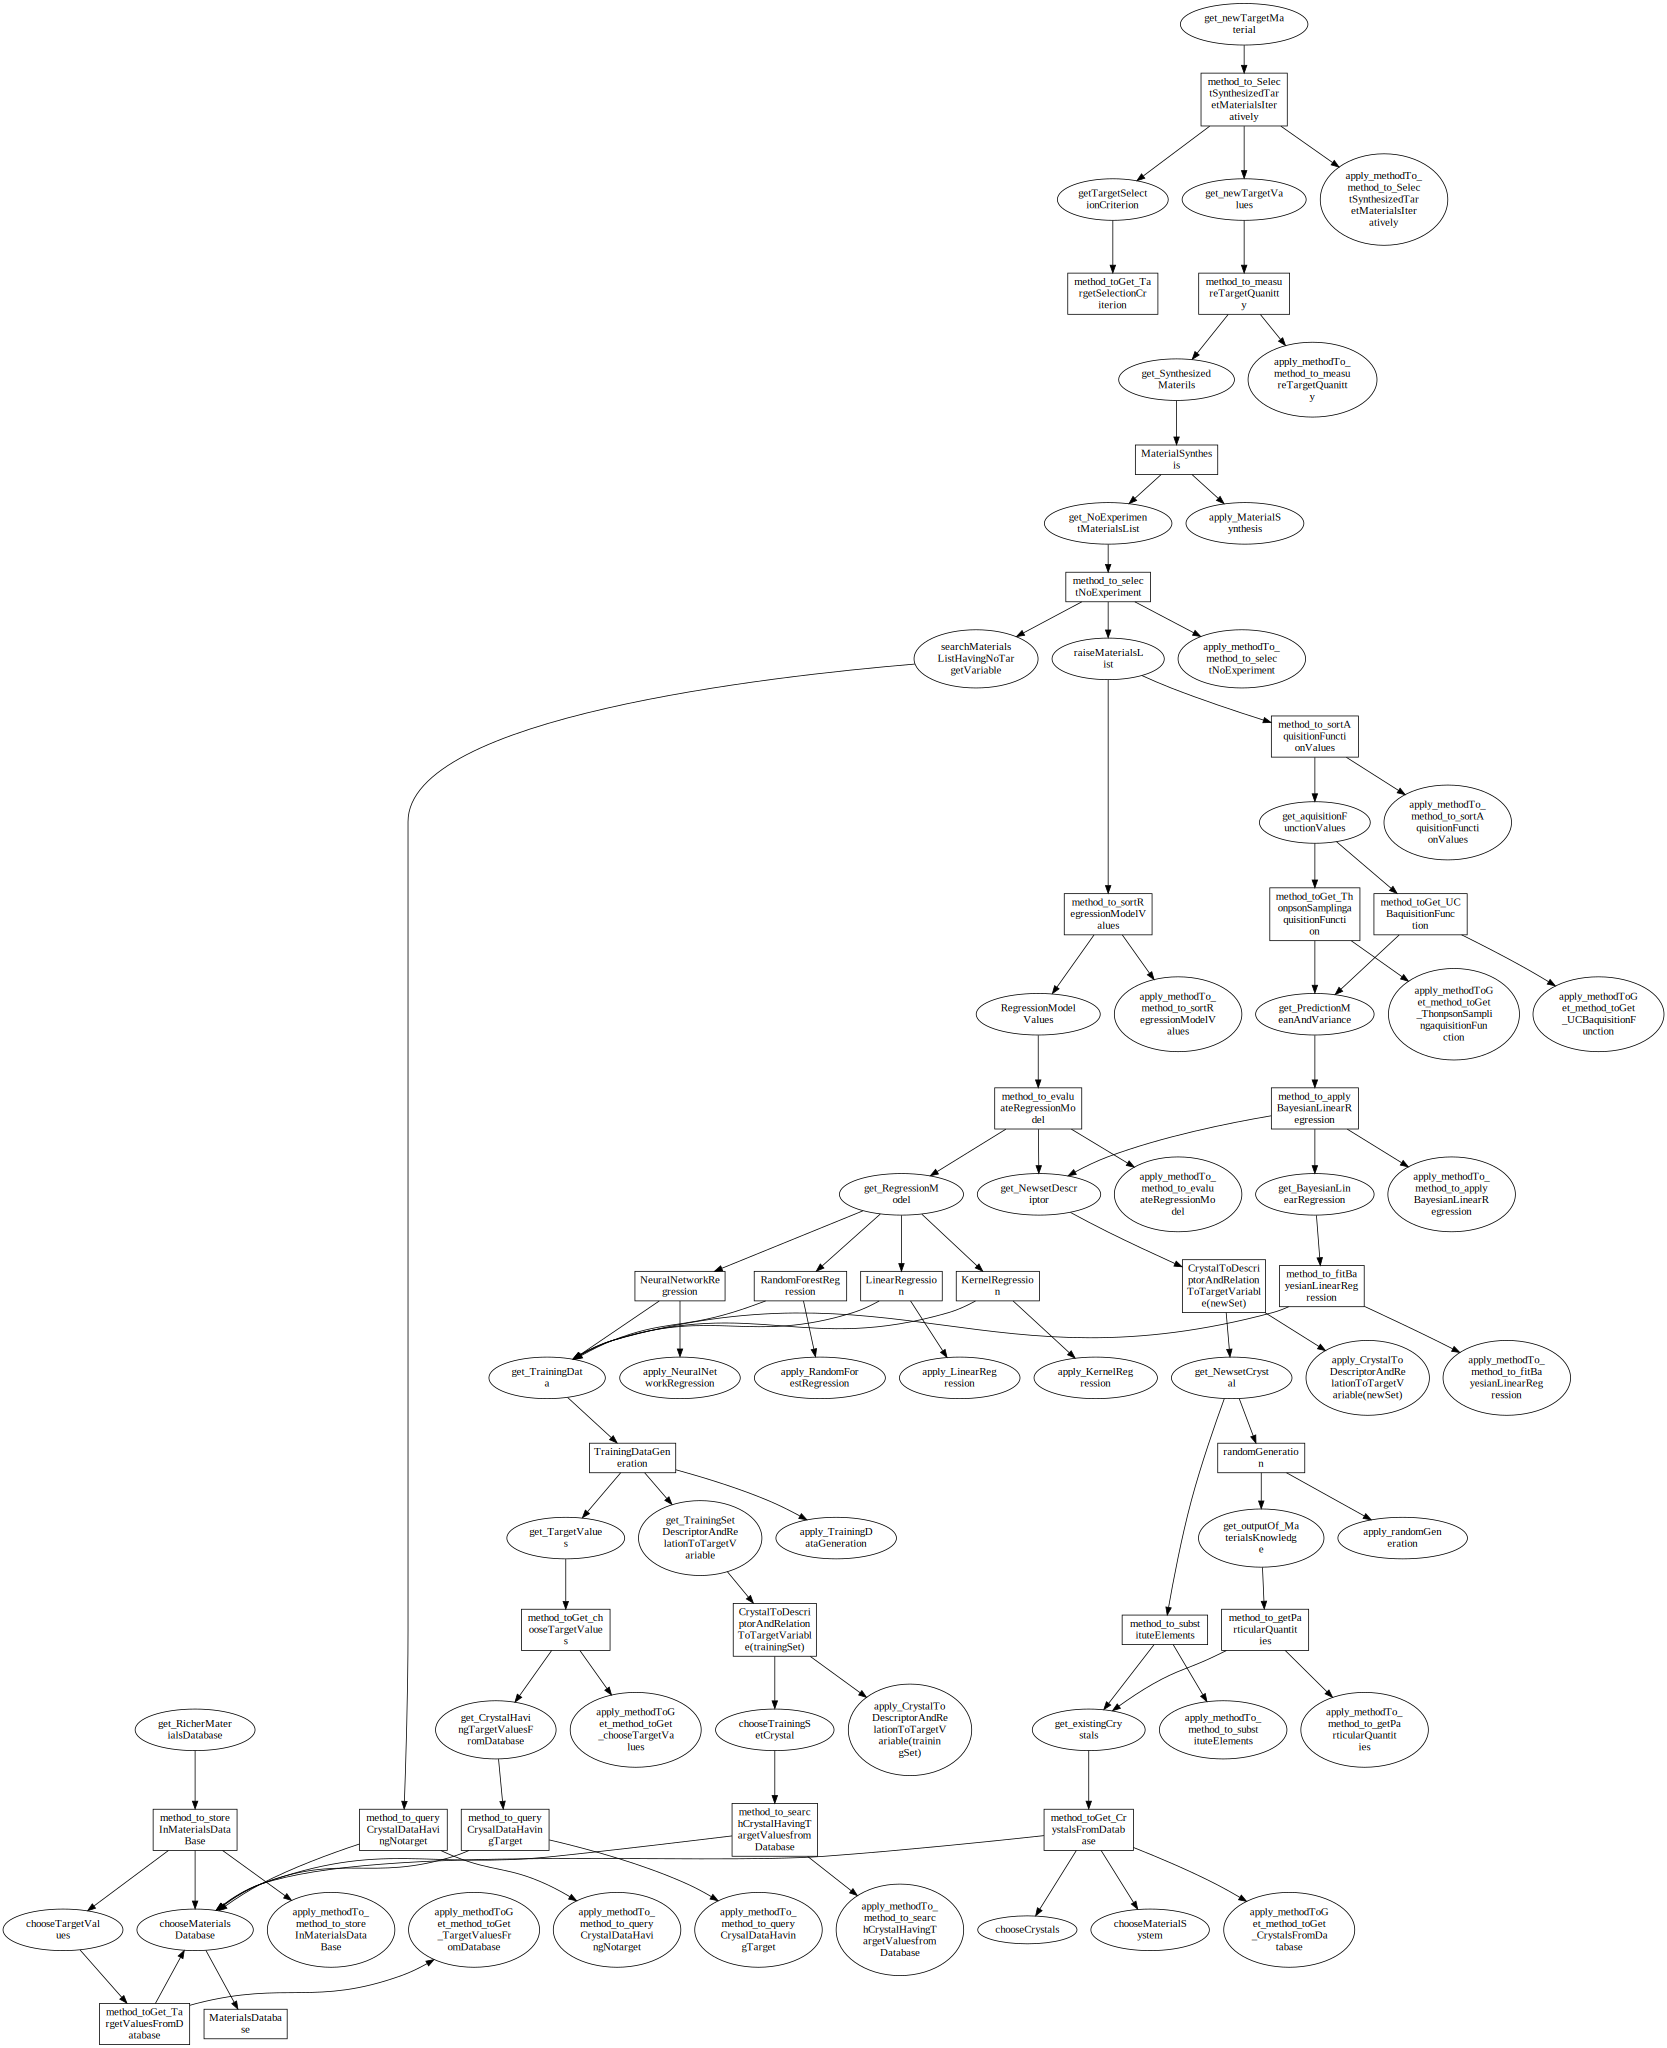

In [68]:
fdtree = cauFirst.FDTree(basename="all")
fdtree.apply(wf)

In [69]:
trainchain = wfchain.search_link("TrainingData","raiseMaterialsList")

found link [['TrainingData', 'RegressionModel'], ['RegressionModel', 'RegressionModelValues'], ['RegressionModelValues', 'raiseMaterialsList']]
found link [['TrainingData', 'BayesianLinearRegression'], ['BayesianLinearRegression', 'PredictionMeanAndVariance'], ['PredictionMeanAndVariance', 'aquisitionFunctionValues'], ['aquisitionFunctionValues', 'raiseMaterialsList']]


In [70]:
newchain = wfchain.search_link("NewsetCrystal","raiseMaterialsList")

found link [['NewsetCrystal', 'NewsetDescriptor'], ['NewsetDescriptor', 'PredictionMeanAndVariance'], ['PredictionMeanAndVariance', 'aquisitionFunctionValues'], ['aquisitionFunctionValues', 'raiseMaterialsList']]
found link [['NewsetCrystal', 'NewsetDescriptor'], ['NewsetDescriptor', 'RegressionModelValues'], ['RegressionModelValues', 'raiseMaterialsList']]


In [71]:
trainchain.extend(newchain)

In [72]:
wfsub = trainchain.to_WF()

png is made.


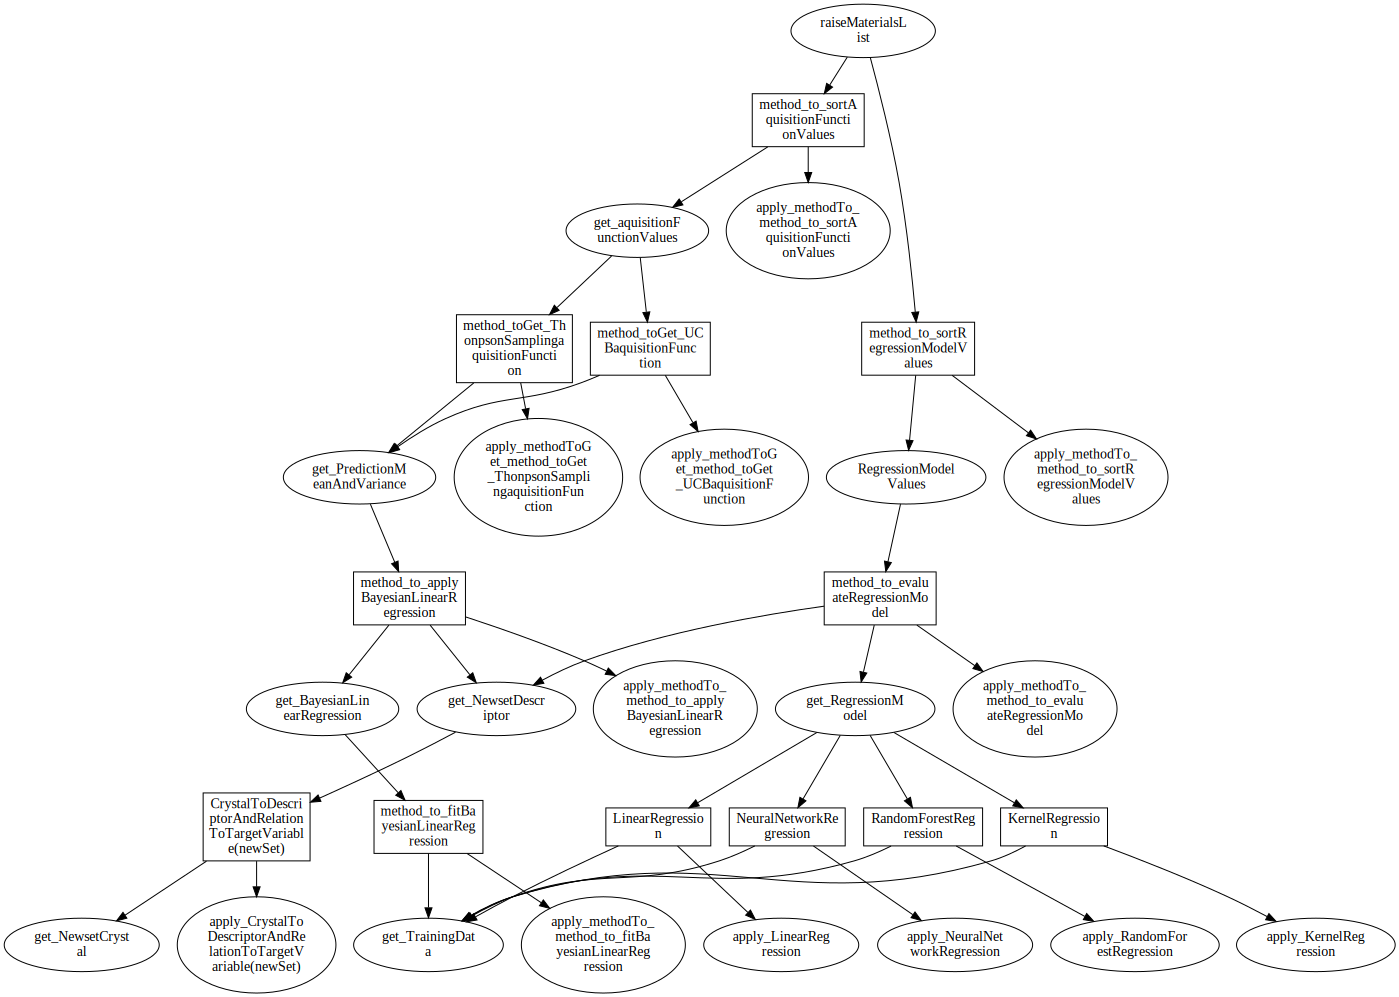

In [73]:
fdtree = cauFirst.FDTree(basename="new")
fdtree.apply(wfsub)